In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [2]:
results = pd.read_pickle('nlbse22_test_with_llama3_predictions_bug_classifier.pkl')
print(results.shape[0])

80518


In [3]:
results.head()

,Unnamed: 0,issue_url,issue_label,issue_created_at,issue_author_association,repository_url,issue_title,issue_body,llama3_prediction
0,6,https://api.github.com/repos/tlnagy/TIFF.jl/issues/7,enhancement,2020-04-07T09:08:50Z,NONE,https://api.github.com/repos/tlnagy/TIFF.jl,"ERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0x0008) not found","One more error might need to be caught.\r\n`4D-series.ome.tif` is sample file from [OME-TIFF website]( https://docs.openmicroscopy.org/ome-model/6.0.0/ome-tiff/data.html).\r\n\r\n```julia\r\njulia> TIFF.load(""4D-series.ome.tif"")\r\nERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0x0008) not found\r\nStacktrace:\r\n [1] getindex(::Dict{Tuple{TIFF.SampleFormats,Int64},DataType}, ::Tuple{TIFF.SampleFormats,UInt16}) at ./dict.jl:477\r\n [2] output(::TIFF.IFD{UInt32}) at /home/hf/.julia/dev/TIFF/src/ifds.jl:113\r\n [3] load(::String) at /home/hf/.julia/dev/TIFF/src/load.jl:14\r\n [4] top-level scope at REPL[2]:1\r\n```\r\n",bug report
1,19,https://api.github.com/repos/tisboyo/Twitch_Bot/issues/57,enhancement,2020-11-27T07:17:21Z,OWNER,https://api.github.com/repos/tisboyo/Twitch_Bot,Add database backup to dropbox,NaN,Not a bug report
2,25,https://api.github.com/repos/DrWhoCares/imgdanke/issues/70,enhancement,2021-01-02T19:35:34Z,OWNER,https://api.github.com/repos/DrWhoCares/imgdanke,Add a button/method to open the Source or Output folders,"Could also add a method to open up path to each file in the File list, by right-clicking.\r\nAlso an option to open up the path to the imgdanke.exe.",Not a bug report
3,30,https://api.github.com/repos/DrWhoCares/imgdanke/issues/72,bug,2021-01-02T20:55:34Z,OWNER,https://api.github.com/repos/DrWhoCares/imgdanke,Processes are being started twice,At some point I refactored a few things and ended up leaving in an additional call to `process.Start()` that should've just been replaced by the `using Process process = Process.Start()` call.,Not a bug report
4,54,https://api.github.com/repos/Bean-1/AOT/issues/3,bug,2020-12-29T15:34:35Z,OWNER,https://api.github.com/repos/Bean-1/AOT,Cannot add hp to wall,NaN,Not a bug report


In [4]:
results['llama3_prediction'].value_counts()

llama3_prediction
bug report                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [5]:
results['llama3_prediction'].unique()

array(['bug report', 'Not a bug report', 'not a bug report', 'Bug Report',
       'Bug report', '"Not a bug report"',
       'I would categorize this issue as a "bug report".',
       '**Bug Report**', '**Not a Bug Report**', 'Not a bug report.',
       'I categorize this issue as: **bug report**', '**bug report**',
       'I would categorize this issue as a **bug report**.',
       'I would categorize this issue as: **bug report**', 'Bug report.',
       'I would categorize this issue as "Not a Bug Report".',
       'I categorize this issue as a "bug report".',
       'I would categorize this issue as "not a bug report". The issue is about creating a login form, which is a new feature request, rather than reporting a problem or unexpected behavior with existing functionality.',
       'A bug report!',
       'I would categorize this issue as a "bug report". The issue title clearly indicates the problem ("Long labels for bar chart get cut off"), and the description provides detailed in

In [6]:
len(results['llama3_prediction'].unique())

168

In [7]:
results['llama3_prediction_organized'] = results['llama3_prediction']

In [8]:
results['llama3_prediction_organized'].to_excel('nlbse22_llama3_predictions.xlsx')

Arranging bug answers

In [9]:
bug_labels = {'bug report',
              'Bug Report',
              'Bug report',
              'I would categorize this issue as a "bug report".',
              '**Bug Report**',
              'I categorize this issue as: **bug report**',
              '**bug report**',
              'I would categorize this issue as a **bug report**.',
              'I would categorize this issue as: **bug report**',
              'Bug report.',
              'I categorize this issue as a "bug report".',
              'A bug report!',
              'I would categorize this issue as a "bug report". The issue title clearly indicates the problem ("Long labels for bar chart get cut off"), and the description provides detailed information about the expected and actual behaviors, including screenshots showing the issue. This meets the criteria for a bug report.',
              '"bug report"',
              'Based on the provided information, I would categorize this issue as a "bug report".',
              'I categorize this issue as: **Bug Report**',
              'A bug report.',
              'I would categorize this issue as a "bug report". The user is reporting an unexpected behavior of the software (Element) where it adds a desktop shortcut after updating, even though they have previously deleted the shortcut. This suggests that there is an error or malfunction in the software\'s update process, which is the definition of a bug.',
              'I would categorize this issue as "bug report".',
              "I've categorized this issue as a **bug report**.",
              'I categorize this issue as a **bug report**.',
              'I would categorize this issue as: **Bug Report**',
              'Based on the provided issue description, I would categorize this issue as a "bug report".',
              'I would categorize this issue as:\n\n**bug report**',
              'This is a "bug report".', 
              'A "bug report"',
              '**Categorization:** Bug Report',
              'Based on the provided issue title and description, I would categorize this issue as:\n\n**Bug Report**\n\nThe issue describes a problem with the maximize button in the popup player not working as expected. The user reports that after opening a video, pressing the open in popup mode, getting out of the app, and then trying to use the maximize button, nothing happens. The expected behavior is that it should return the app to the main player.',
              '**Bug Report**\n\nIssue Title: no-array-for-each: uses const when variable assigned\n\nIssue Description: ...',
              'This issue should be categorized as a "bug report".\n\nThe user reports that the `-x` option does not prevent transcoding when downloading audio files from SoundCloud, despite specifying the `--audio-format` as `"best"`. This is considered a bug because it deviates from the expected behavior of the tool.',
              'This is a Terraform 0.14.8 bug report.',
              'I categorize this issue as:\n\n**BUG REPORT**',
              'A well-structured bug report!\n\nHere\'s the summary:\n\n**Issue Title:** Strange behaviour of "back" button\n**Issue Description:**\n\nThe reporter experiences strange behavior when pressing the back button in NewPipe. When watching a video, pressing the back button takes them to a previously viewed video (perhaps partially) instead of returning to the video list they were viewing before. This behavior is not consistent and may require multiple presses of the back button to return to the expected video list.\n\n**Checklist:**\n\nThe reporter has checked the following:\n\n1. They are using the latest version of NewPipe (0.20.8).\n2. They have checked for duplicates in the repository.\n3. They have read the contribution guidelines.\n4. This issue contains only one bug report.\n\n**Steps to Reproduce:**\n\n1. Watch a video from one of the available video lists, e.g., "What\'s new".\n2. Press the Android back button.\n\n**Actual Behavior:**\n\nNewPipe displays a previously viewed video (perhaps partially) instead of returning to the original video list.\n\n**Expected Behavior:**\n\nThe back button should take them back to the original video list where they were before watching the first video.\n\n**Screenshots/Screen Recordings:**\n\nNo screenshots or screen recordings are provided, but the reporter mentions that this behavior is not consistent and may require multiple presses of the back button to return to the expected video list.\n\n**Logs:**\n\nNo logs are provided, as the issue does not seem to be related to a crash or error page.\n\n**Device Info:**\n\nThe reporter uses an Android 10 device (Samsung phone).',
              'Based on the provided information, I categorize this issue as a "bug report".',
              'I would categorize this issue as a "bug report". The user is experiencing an unexpected behavior, receiving random debug messages when running Artisan commands, which suggests that there is an error or anomaly in the system.',
              'I would categorize this issue as:\n\n**Bug Report**',
              'Based on the provided information, I categorize this issue as a **BUG REPORT**.',
              "A nice, well-structured issue!\n\nTo help you debug and resolve this issue by yourself, here are some hints:\n\n1. **Check your package versions**: Although you mentioned you're using `webpack@4.44.2`, make sure that all dependencies and plugins are also up-to-date.\n2. **Verify your `webpack.config.js` configuration**: Review the extract you provided and ensure that it's correct and consistent across all environments (local, GCP cloudbuild).\n3. **Enable debugging in your `cloudbuild.yaml`**: Try adding a `debug` section to your `cloudbuild.yaml` file to enable verbose logging. This might help you identify the root cause of the issue.\n4. **Check for conflicts with other plugins or loaders**: As you mentioned, you're using Apollo-Upload-Client and GraphQL-JS, which might be causing issues. Try disabling these plugins or loaders temporarily to see if it resolves the problem.\n5. **Use a more detailed error message**: Instead of relying on the default error message, try enabling more verbose logging in your `webpack.config.js` file by setting `stats: 'verbose'`.\n6. **Inspect the source maps**: Since the error seems related to source maps, inspect the generated source map files to see if there are any issues with them.\n7. **Test on a local environment with similar settings**: Try replicating the GCP cloudbuild environment locally by using a Docker image or a similar setup. This might help you isolate the issue.\n\nBy following these hints, you should be able to identify and resolve the root cause of this issue.\n\n**Classification:** Bug report",
              'A bug report',
              'Based on the provided issue description, I would categorize this issue as:\n\n**bug report**\n\nThe issue appears to be related to an unexpected token error in RStudio, specifically with the `->` operator in a multi-line string assignment. The reporter has followed the guidelines for submitting good bug reports and has included all required information, making it a valid bug report.',
              'This is a bug report.',
              '**Bug Report**\n\n### Expected Behaviour\n\nThe vertical flip of the oculars should only rotate the image 180 degrees, without flipping it horizontally.\n\n### Actual Behaviour\n\nWhen the vertical flip (CTRL+Shift+V) is enabled, the compass rose is not just rotated vertically, but also horizontally, resulting in an unexpected and incorrect orientation.\n\n### Steps to reproduce\n\n1. Activate oculars\n2. Select an ocular/telescope combination, eg Plossl 40mm/C11 f/10\n3. Check that compass rose is active\n4. Enable horizontal flip (CTRL+Shift+H) -> observe that E/W are flipped\n5. Disable horizontal flip -> observe that N up, S down, E left, W right\n6. Enable vertical flip (CTRL+Shift+V)\n\n**Bug:** NS are flipped, but EW are also flipped.\n\n### System\n\n* Stellarium version: Stellarium 0.20.4-817beea [master]\n* Operating system: KUbuntu 20.04\n* Graphics Card: <Manufacturer and Model>\n* Screen type (if applicable): Resolution, HighDPI, scaling',
              '**Bug Report**\n\n(Note: This is a categorization based on the provided issue description, which indicates an unexpected behavior of the IntelliSense feature in VS Code after an update.)',
              "A classic bug report!\n\nHere's the breakdown:\n\n* **Bug**: Yes, it's a bug report.\n* **Description**: The activity returns an associative array (e.g., `['Peter' => '123', 'Ben' => '234', 'Joe' => '345']`), but when used in a workflow, it is parsed as an object (`stdClass`) instead of an array.\n* **Steps to reproduce**: 1. Return the associative array from an activity method; 2. Use the return value as an associative array in a workflow.\n* **Expected behavior**: The return value should be treated as an array, not an object.\n* **Screenshots/Terminal output**: A warning and error message are displayed indicating that the attempt to use the object as an array failed.\n\n**Versions**: Linux OS, Temporal Version 1.7.0, using Docker.\n\nOverall, this is a bug report, and it's important to categorize it correctly so that the relevant team can address the issue promptly.",
              'I would categorize this issue as a "bug report". The description mentions the reaper failing to get the correct JMX secret when the release name and cluster name are not the same, which indicates unexpected behavior of the Reaper component in the Cassandra chart.',
              'A bug report.\n\nThe issue description suggests that the custom domain unexpectedly gets destroyed when deploying a Jets app, specifically with version 3.0.2/3.0.5 on Ubuntu Linux, using Ruby 2.7.0. The problem arises when deploying to AWS Lambda using `jets deploy staging` with a configuration that includes a custom domain.\n\nThe issue is reproducible by following the steps outlined in the "Step-by-step reproduction instructions" section: creating a new Jets app, setting the appropriate config for the staging/production environment, and deploying it. The problem occurs when there is an existing custom DNS record in AWS Route53.\n\nThe provided code samples demonstrate the difference in CloudFormation templates between Jets versions 2.3.x and 3.0.x, which leads to the unexpected behavior of removing or creating DNS records during deployment.\n\nA possible solution suggested by the issue creator is to stop checking if the record exists in AWS already, as it breaks the documented feature.',
              'This issue can be categorized as a "bug report".',
              'A "bug report".\n\nThe issue description explains the problem with complex templating in `Values.alertmanager.config` not being allowed, which prevents dynamic creation of AlertManager routes and receivers at Prometheus-Kube-Stack deployment based on namespaces with specific labels. The Helm templating does not support range or if-else blocks, making it difficult to achieve the desired configuration.',
              'I can categorize this issue as: **bug report**',
              'A nice, well-formatted bug report!\n\nI would categorize this issue as: **bug report**',
              'Here is the summary of the issue:\n\n**Issue Title:** aci_l3out_path_attachment rejects custom MTU Values\n\n**Summary:**\n\nThe `aci_l3out_path_attachment` resource in Terraform does not accept custom values for the MTU (Maximum Transmission Unit). It only accepts the value "inherit".\n\n**Steps to Reproduce:**\n\n1. Run `terraform apply`\n\n**Debug Output:** Not provided (expected a link to a GitHub Gist)\n\n**Panic Output:**\n\nError: expected mtu to be one of [inherit], got 9000\n...\n\n**Expected Behavior:** Ability to set MTU value\n\n**Actual Behavior:** Only accepts "inherit" as the MTU value\n\nThis issue is categorized as a "bug report".',
              'A well-structured bug report!\n\nHere\'s a summary of the issue:\n\n**Title:** Lights groups can\'t be dimmed up or down in Android Power Menu\n\n**Problem description:**\n\nThe user is unable to dim a group of lights (with dimmable lights) in the new power menu.\n\n**Details:**\n\n* Home Assistant Android version: 2021.5.1-full\n* Android version: 11\n* Phone model: OnePlus Nord (AC2003)\n* Home Assistant version: core-2021.5.5\n* Last working Home Assistant release (if known): Not specified\n* Screenshots provided showing the issue with the lights group "Chambre Yvan"\n\n**Category:** Bug report',
              'I would categorize this issue as a "bug report". The description provides a specific scenario where the Home Assistant Android app freezes after unlocking the phone, and it seems to be related to the power button being pressed first. This suggests that there may be an unexpected behavior or error in the app\'s handling of the unlock event, which meets the criteria for a bug report.',
              'BUG REPORT',
              'I categorize this issue as:\n\n**Bug Report**',
              "**Bug Report**\n\nThe issue description indicates that the `plotTypeData` column with `'replicate'` does not work as expected, resulting in plotting all data points instead of individual replicates. Additionally, there is an error when trying to manually specify `plotted_noise='replicate'`. The error message suggests that the `conditions` object has a wrong data type, which prevents proper plotting.\n\nThe solution proposed by the user includes two parts:\n\n1. Allowing `plotTypeData` with `'replicate'` to automatically plot individual replicates without requiring additional manual specification.\n2. Enabling plotting of individual data points as replicates, allowing for more flexibility in visualizing the data.\n\nOverall, this issue appears to be a bug report because it describes an unexpected behavior in the software (PETAB) where the expected result is not achieved.",
              'I would categorize this issue as a "bug report". The user is experiencing an unexpected behavior with the MSAL library, specifically when trying to log out from their SPA application, where they are prompted to select an account even though there is only one account available. This behavior is not expected and is causing inconvenience for the user.',
              'I categorize this issue as: bug report',
              "A bug report!\n\nHere's the summary:\n\n**Issue Title:** (Author) citation style is missing closing parenthesis.\n\n**Description:**\n\nWhen adding a structured citation to a publication and choosing the (Author) inline style, the resulting citation does not include a closing parenthesis, as shown in the screenshot.\n\n**Steps to Reproduce:**\n\n1. Add a structured citation to a publication.\n2. In Pub Settings, choose the (Author) inline style.\n\n**Expected Behavior:** Closing parenthesis should be present.\n\n**URL to See the Issue:** https://demo.duqduq.org/pub/diasuuy0/draft\n\n**Browser/Operating System:** Mac / Chrome",
              'I categorize this issue as:\n\n**bug report**',
              'Based on the provided template and issue description, I would categorize this issue as:\n\n**bug report**\n\nThis is because the user has reported an issue with playing a video stream in NewPipe, specifically "Couldn\'t request stream of video", and has provided a detailed description of the steps to reproduce the bug, along with a log file showing the error message.',
              'I would categorize this issue as a "bug report". The issue reports a crash (SIGSEGV) when running the `ytt` command with multiple exclusion file marks, which is unexpected behavior and indicates an error in the software.',
              'I would categorize this issue as a **BUG REPORT**.',
              'I would categorize this issue as: bug report',
              'A detailed issue report!\n\n**Bug Report**\n\nThis issue appears to be a genuine bug in Laravel-Excel 3.1.19, specifically when using queued exports with appended jobs and Redis as the queue driver.\n\nThe problem seems to be that the export process remains attached to the current process even after queuing the job, causing the app to remain stuck until the job is completed or the user manually closes the process (e.g., by pressing ESC).\n\nTo reproduce this issue, you can use the code provided in the "Steps to Reproduce" section. The expected behavior is that the export should be sent to the queue and the user redirected back with a success message. However, the actual behavior is that the app remains attached to the process, making it impossible to proceed without waiting for the job to complete or closing the process manually.\n\nTo resolve this issue, the Laravel-Excel team may need to investigate and fix any underlying issues related to job processing and queue handling in Redis.',
              'A technical issue!\n\nBased on the provided information, I categorize this issue as:\n\n**Bug Report**\n\nThe issue description mentions an unexpected error message when trying to save the STORE URL: "Wrong field specified." This suggests that there is an error in the underlying code or configuration that prevents the value from being saved.',
              'Based on the provided issue description, I categorize this issue as a **bug report**.',
              'I would categorize this issue as: "bug report"',
              'This is a **bug report**.',
              'A categorized issue!\n\n**Category:** Bug Report',
              "Here's the categorized issue:\n\n**Bug Report**\n\nPlease note that I've filled in the template with the required information, and also deleted the initial text as per your request. Let me know if you need any further assistance!",
              '**Bug Report**\n\nThe issue title is: "ZeroDivisionError: float division by zero"\n\nThe general summary of the issue is: A ZeroDivisionError occurs when trying to calculate thread utilization in `newrelic/core/thread_utilization.py` due to elapsed time being 0, causing an exception.',
              'Based on the provided information, I would categorize this issue as:\n\n**bug report**\n\nLet me know if you need anything else!',
              '**Bug report**',
              'This issue is a **bug report**.',
              '**Categorization**: Bug Report',
              'Based on the issue description, I would categorize this issue as:\n\n**Bug Report**\n\nThe issue appears to be related to an unexpected behavior in the PyqtGraph ParameterTree widget, specifically with regards to the "dec" option and stepping around zero values. The error message suggests a KeyError when attempting to access the \'minStep\' key, indicating that the software is encountering an unexpected situation where it cannot find the expected value.',
              'Based on the provided information, I categorize this issue as:\n\n**Bug Report**',
              'Based on the issue description, I would categorize this issue as a "bug report". The issue appears to be related to errors in the index.html file, specifically with elements such as `<br>`, `<a>`, and `<iframe>` not being allowed within certain contexts (e.g., `<ul>`), and other issues such as unclosed tags, obsolete attributes, and stray start tags.',
              'The issue is about the differences in flattening between Better and EHRbase when creating WebTemplates based on OPTs.\n\nThe actual result shows a JSON fragment with an Element type having a missing "nodeId" property, which seems to be related to the flattening process not properly handling children elements.\n\nThe expected result (Acceptance Criteria) shows the expected JSON structure with the "nodeId" property included in the Element type. It appears that the SDK is not correctly flattening the Element and its children.\n\nThis issue is a bug report, as it\'s reporting an unexpected behavior of the software (EHRbase).',
              'This issue appears to be a bug report, categorized as such due to the presence of a crash when reordering channel groups in NewPipe. The issue includes:\n\n1. A clear and concise title: "Crash when reordering channel groups"\n2. A detailed description of the steps to reproduce the bug:\n\t* Create 2+ channel groups\n\t* Press on the reorder icon right of the "Channel groups" text\n\t* Attempt to move any group\n3. Actual behavior: The app crashes.\n4. Expected behavior: The group is moved, and the app doesn\'t crash.\n5. Screenshots/Screen recordings: A video showing the crash (https://user-images.githubusercontent.com/12615679/107941019-c3bfcc80-6f91-11eb-99be-d11103dd5584.mp4)\n6. Logs: The user is still working on generating a logcat report.\n\nOverall, this issue meets the requirements for a bug report and can be categorized as such.',
              '**BUG REPORT**',
              'Here\'s the rewritten issue with all sections filled out:\n\n**Can\'t subscribe to channels without videos**\n\n<!--\r\nOh no, a bug! It happens. Thanks for reporting an issue with NewPipe. To make it easier for us to help you please enter detailed information in the template we have provided below. If a section isn\'t relevant, just delete it, though it would be helpful to still provide as much detail as possible.\r\n-->\r\n\r\n### Checklist\n- [x] I am using the latest version - 0.21.0 <!-- Check https://github.com/TeamNewPipe/NewPipe/releases -->\n- [x] I checked, but didn\'t find any duplicates (open OR closed) of this issue in the repo. <!-- Seriously, check. O_O -->\n- [x] I have read the contribution guidelines given at https://github.com/TeamNewPipe/NewPipe/blob/HEAD/.github/CONTRIBUTING.md.\n- [x] This issue contains only one bug. I will open one issue for every bug report I want to file.\n\n### Steps to reproduce the bug\n1. Go to the YouTube search page and type in "subscribers without videos".\n2. Tap on a channel that doesn\'t show any videos.\n\nThe search term is just to find empty channels, I don\'t want to subscribe to those, but sometimes people announce new channels that don\'t have videos yet and it would be nice to have them in NewPipe so they show up in the new video feed once videos get uploaded.\n\n### Actual behaviour\nThe channel header with a subscribe button shows up for a moment, then gets replaced by a "No videos" message.\n\n### Expected behavior\nChannel header stays, the "No videos" message only occupies the space where the videos would go, so the subscribe button is always visible.\n\nThere\'s also a loading circle animation when looking for videos on a channel that seems to do the same and could also just be below the header instead of replacing it to keep the UI less busy.\n\n### Screenshots/Screen recordings\n<!-- No screenshots or screen recordings provided. -->\n\n### Logs\nNo logs generated by NewPipe.\n\n### Device info\n- Android version/Custom ROM version: [insert Android version]\n- Device model: [insert device model]\n\nPlease categorize this issue as a "bug report".',
              'I would categorize this issue as a "bug report". The user is experiencing an unexpected behavior, specifically the message "content unavailable" when scrolling through YouTube channel videos, even though there are more videos available on the channel. This suggests that there may be an error or malfunction in the NewPipe software, which is consistent with the definition of a bug report.',
              'I would categorize this issue as a "bug report". The issue appears to be related to an error in updating the EKS cluster configuration, with a specific error message indicating that only one type of update can be allowed.',
              '**Bug Report**\n\nThis issue appears to be a genuine bug report, as it describes a specific problem with the Camunda Modeler application: when copying an element that has another element inside it, the application throws an error and becomes unresponsive. The error message suggests that this might be related to a plugin compatibility issue, which further supports the classification of this issue as a bug report.',
              'A Bug Report!',
              '**Output:**\n\n* `sls invoke local -f hello` output:\n```bash\n% sls  invoke local -f hello\nServerless: In order to get human-readable output, please implement "toString()" method of your "ApiGatewayResponse" object.\n2021-04-08 14:45:14  INFO  Handler:18 - received: {}\n\n2021-04-08 14:45:14  INFO  Handler:23 - Foo is "null"\n\ncom.serverless.ApiGatewayResponse@4009e306\n```\n* `serverless --version` output:\n```bash\nFramework Core: 2.34.0\nPlugin: 4.5.3\nSDK: 4.2.2\nComponents: 3.8.2\n```\n\n**Issue categorization:** bug report',
              'I would categorize this issue as a "bug report". The issue describes a specific problem with the Home Assistant Android app, where it gets stuck in a loop reporting "The Lovelace UI configuration for this dashboard was updated. Refresh to see changes?" when the `ui-lovelace.yaml` file is blank. This suggests that there is an unexpected behavior or error in the app\'s handling of YAML-mode Lovelace configurations.',
              "Based on the provided information, I would categorize this issue as:\n\n**bug report**\n\nLet me know if you'd like me to help with anything else!"}

results['llama3_prediction_organized'] = results['llama3_prediction_organized'].replace(bug_labels, 'bug')

Arranging not-bug report answers

In [10]:
not_bug_labels = {'Not a bug report',
                  'not a bug report',
                  '"Not a bug report"',
                  '**Not a Bug Report**', 
                  'Not a bug report.',
                  'I would categorize this issue as "Not a Bug Report".',
                  'I would categorize this issue as "not a bug report". The issue is about creating a login form, which is a new feature request, rather than reporting a problem or unexpected behavior with existing functionality.',
                  '**Not a bug report**',
                  'I would categorize this issue as "not a bug report".',
                  'I would categorize this issue as: **Not a Bug Report**',
                  'I would categorize this issue as "not a bug report". The user is asking for help with importing CSV files into Firefly III, specifically wanting to know the best way to preprocess the file and whether it\'s possible to add a regex preprocessor to the CSV import process. This is not an unexpected behavior or error in the software, but rather a request for assistance with using the software\'s features.',
                  '**Not a Bug Report**\n\nThis issue appears to be related to the installation process of OpenHAB, specifically with regards to resolving an artifact dependency for MySQL connector Java (mysql:mysql-connector-java:jar:8.0.13). The symptoms described suggest that the problem might be due to missing or incorrect certificates in the keystore.',
                  "This issue is **Not a Bug Report**. The user is seeking guidance on how to test components with `@azure/msal-react`'s `AuthenticatedTemplate` and `UnauthenticatedTemplate` using Jest, rather than reporting a bug in the library or its functionality.",
                  'Based on the issue description, it appears that this is a "feature request". The user wants to utilize timm\'s scheduler in their PyTorch Lightning project, but pytorch_lightning doesn\'t accept custom classes for schedulers, and timm\'s scheduler is not compatible with torch.optim.lr_scheduler class.',
                  'I would categorize this issue as **not a bug report**.',
                  'I would categorize this issue as **Not a Bug Report**.',
                  'I would categorize this issue as: "not a bug report"',
                  'I would categorize this issue as a "not a bug report".',
                  'I would categorize this issue as "not a bug report". The issue is requesting a rename of a field in the `PropertyValue` type, which is likely a feature request or a documentation update rather than a report of an unexpected behavior or error.',
                  'I would categorize this issue as "not a bug report". The issue description does not describe an unexpected behavior or an error, but rather a disagreement with the design choice made in the mkdocs-material template regarding the inline code style for admonitions. The issue seems to be more about the aesthetics and usability of the feature, rather than an actual bug.',
                  'I would categorize this issue as: **not a bug report**',
                  'I categorize this issue as: **Not a Bug Report**',
                  "A well-formatted issue template!\n\nHere's the classification:\n\n**Not a Bug Report**\n\nThe issue is related to the expected behavior of `lsp_document_symbols` not working when the buffer is not saved, but it does work after saving the file. This is likely due to the way LSP (Language Server Protocol) interacts with Vim, rather than a bug in Telescope or nvim itself.",
                  'I would categorize this issue as "Not a bug report".',
                  'I would categorize this issue as a "feature request".',
                  'I would categorize this issue as **NOT A BUG REPORT**.',
                  'I would categorize this issue as: Not a Bug Report',
                  'This is an issue request for adding nodes to the aci_firmware_group in firmware. The description provides a helpful summary of the feature request, and potential Terraform configuration code is provided. The community note at the top requests that users vote on the issue by adding a reaction and do not leave comments that don\'t add new information or questions.\n\nThe issue contains the following details:\n\n* Issue title: Firmware Node Block - Add Nodes to aci_firmware_group\n* Community note:\n\t+ Please vote on this issue by adding a reaction to help prioritize this request.\n\t+ Do not leave "+1" or other comments that do not add relevant new information or questions, as they generate extra noise for issue followers and do not help prioritize the request.\n\t+ If you are interested in working on this issue or have submitted a pull request, please leave a comment.\n* Description: The provider does not currently support adding nodes to the aci_firmware_group.\n* New or affected resources + ACI Class(es): \n\t+ aci_firmware_group_nodeblock\n\t+ No other resources are mentioned.\n* APIC version and APIC Platform: All versions/platforms are affected.\n* Potential Terraform Configuration: Code is provided for creating a fabricNodeBlk resource in Terraform.\n\nOverall, this issue request aims to add the functionality of adding nodes to the aci_firmware_group in firmware.',
                  'I would categorize this issue as: **Not a bug report**',
                  '**Categorization:** Not a Bug Report\n\nThis issue is a feature request to extend the left sidebar in Files to cover the title bar (tab page bar) area and limit the tab page bar to the right area of the window, similar to the design seen in Windows 10 Settings and macOS 11 Big Sur Finder. The issue description provides a detailed explanation of the problem, alternatives considered, and additional context, including screenshots for better understanding.',
                  'I would categorize this issue as "not a bug report". The issue is related to the expected behavior of the Auth0 library in combination with the application\'s Angular implementation, rather than an unexpected or incorrect behavior of the library itself.',
                  'I would categorize this issue as "Not a Bug Report". The issue description mentions various visual issues, layout problems, and suggestions for improvement, but none of them point to any unexpected or erroneous behavior of the website\'s software. It appears to be a list of UI/UX concerns that need attention.',
                  'I would categorize this issue as "Not a bug report". The issue description explains a feature request for improving the Guide module\'s functionality, specifically suggesting a new feature to correct target drift through dither commands, which is not related to an unexpected behavior or error.',
                  'This issue should be categorized as "not a bug report".',
                  'I would categorize this issue as "not a bug report". The issue is actually a question about how Conditional Access Policy\'s sign-in frequency affects msals behavior, and the reporter has already tested it and found that it doesn\'t affect access token or refresh token lifetime. It seems like a legitimate inquiry rather than an unexpected error or faulty behavior.',
                  '**Not a Bug Report**\n\n(Implicitly selected by the user, as there was no explicit categorization)',
                  'I would categorize this issue as "feature request". The issue description clearly outlines a specific feature request, which is to modify the Home Assistant Companion app to look for and parse Torque log files on the SD card of an Android device. There are no indications of unexpected behavior or errors in the software, making it a feature request rather than a bug report.',
                  'This issue is not a bug report.\n\nThe problem described in the issue title "Use SVG element for create custom node" is about using an SVG element to create a custom node, which seems to be a feature request or enhancement rather than a bug report. The issue description mentions that the user wants to write an IoT configuration user interface with drag/drop/resize functionality and use SVG elements to create custom nodes, suggesting that this is a new feature being requested rather than a bug being reported.',
                  'I would categorize this issue as "not a bug report". The issue description does not describe any unexpected behavior or errors with the software, but rather requests guidance on how to implement an anti-spoofing algorithm for GPS signals and uses the hackRF device to receive the signal.',
                  'A GitHub issue!\n\nBased on the description, I would categorize this issue as:\n\n**Not a bug report**\n\nReason: The issue is requesting additional configuration options for the Docker plugin, specifically "source of mounts", which is not related to an unexpected behavior or error in the software. It\'s more like a feature request to enhance the plugin\'s functionality.',
                  'I would categorize this issue as "not a bug report". The issue description indicates the creation of a new feature, specifically implementing the `runAdAuction` method according to Fledge specs, whereas a bug report would typically describe an unexpected error or behavior in existing software.',
                  'I would categorize this issue as "feature request".',
                  'A "not a bug report".',
                  'I would categorize this issue as a "feature request". The issue is not about a problem with the plugin\'s current behavior, but rather a request for a new feature or functionality (in this case, compiling .less files).',
                  'I would categorize this issue as "not a bug report". The issue is requesting an enhancement to the mod "Dirt to Path" rather than reporting a problem or unexpected behavior with the software.',
                  'Here\'s a summary of the issue:\n\n**Issue Title:** Feature Request: add a way to override name of the resource group created by the management resources.\n\n**Description:**\n\n* The feature request is not related to a problem.\n* The current behavior is that a resource group with the name `<id>-mgmt` is created by the module, but the user would like to be able to change this name to fit their naming convention using the `azurecaf_name` and `azurecaf_naming_convention` modules.\n\n**Additional Context:**\n\n* The issue categorizes as "not a bug report", indicating that it is a feature request rather than an unexpected behavior or error.',
                  "Based on the provided information, I would categorize this issue as:\n\n**Not a Bug Report**\n\nThe reason for this classification is that the issue description does not suggest an unexpected or incorrect behavior of MessageKit or any other related software. Instead, it appears to be a configuration or implementation issue specific to the user's code, which is being used with MessageKit.",
                  'I would categorize this issue as "not a bug report". The issue title is "ECR cross region image replication", which suggests it\'s a feature request rather than a report of a specific error or unexpected behavior.',
                  'I would categorize this issue as "not a bug report". The issue description indicates that the user is experiencing a problem accessing a website (`app.energized.pro`), but it\'s not related to a bug in Energized Protection or any other software. Instead, it appears to be an issue with the PHP installation on the website itself, which requires the MySQL extension.',
                  'I would categorize this issue as **not a bug report**. The issue description does not describe an unexpected behavior or error, but rather a requested feature (disabling text selection) that would make more sense for the application.',
                  'Based on the provided issue description, I would categorize this issue as "not a bug report". The issue appears to be related to a feature request or a workaround for a specific use case rather than an unexpected behavior or an error in the Laravel-Excel package.',
                  'I would categorize this issue as "not a bug report". The issue appears to be a request for a feature enhancement in the Azure Terraform provider, specifically the ability to set the `firewallPolicy` field in `PathRule` objects. There is no indication of unexpected behavior or an error being encountered, which is typical of a bug report.',
                  "Based on the provided information, I would categorize this issue as **Not a Bug Report**. The issue seems to be related to rendering a table in GitBook format (HTML) and it's not an unexpected behavior or an error with the Bookdown package.",
                  'Based on the provided information, I categorize this issue as:\n\n**Not a Bug Report**\n\nThe issue seems to be related to documentation or best practices for handling exceptions in NestJS, rather than an unexpected behavior or error in the framework itself. The user is seeking guidance on how to catch and handle configuration validation errors thrown by @nest/config, which appears to be a legitimate question about using the library correctly.',
                  "**Not a Bug Report**\n\n(Note: The provided logs are for debugging purposes, but there's no indication of an unexpected behavior or error, suggesting it's not a bug report.)",
                  'I would categorize this issue as "not a bug report". The issue description does not mention any unexpected behavior or error, but rather a request for a specific feature or configuration (using Elyra with KFP + Tekton in ODH).',
                  'I would categorize this issue as "not a bug report". The issue is asking for an enhancement to the coffee maker\'s switch functionality, specifically requesting the inclusion of a contact sensor instead of a traditional switch. There is no indication of any unexpected behavior or error occurring in the software, which suggests that it is not a bug report.',
                  'This issue is a "**Not a bug report**". The issue is requesting a minor PHPDoc change in the Laminas\\Form\\Element\\Select class to allow for setting the empty option as an array with HTML attributes, which would not be a breaking change and would not affect the functionality of the class.',
                  'Based on the provided information, this issue appears to be a feature request for a "Timeline" component in the IduxFE components repository.\n\nThe description includes:\n\n1. An explanation of the problem the feature solves: The description does not explicitly state what problem the feature solves, but it seems that the goal is to create a Timeline component that can display a sequence of events or nodes.\n2. A proposed API for the Timeline component:\n\t* Attributes: `pending`, `pendingDot`, `reverse`, and `mode`\n\t* Slots: `default`, `pending`, and `pendingDot` (for customizing the appearance of pending nodes)\n3. An explanation of how to use the slots:\n\t* `default`: for customizing the content of each timeline item\n\t* `pending`: for customizing the content of pending nodes\n\t* `pendingDot`: for customizing the time axis point for pending nodes\n\nOverall, this issue appears to be a feature request for a Timeline component that allows users to customize its appearance and behavior through attributes and slots.',
                  '**Not a Bug Report**\n\n(Note: I\'ve categorized this issue as "not a bug report" because it appears to be a user configuration or deployment issue, rather than a problem with the Azure Web App itself.)',
                  'I would categorize this issue as "not a bug report". The issue title is "Add NFT (scope) APIs", which suggests that the request is for new functionality rather than reporting an error or unexpected behavior in the existing code.',
                  'I would categorize this issue as "Not a Bug Report". The issue is more about the design and usability of the conversation flow, rather than an unexpected behavior or error in the software. It\'s a request for improvement to make the interface more intuitive and user-friendly.',
                  'This is a feature request for a "User Scripts Component" in the browser, which would allow users to install and manage user scripts (e.g., Greasemonkey or Tampermonkey) without leaving a trace in the DOM.\n\nThe issue description mentions that some users find privacy pop-ups annoying, especially Google\'s ones. The author initially thought about reusing an existing patch for AMP tracking ads and video, but then discovered the possibility of activating support for user scripts, which leaves no trace in the DOM.\n\nThe author has already made progress on the feature, including:\n\n* Reading from a folder\n* Preferences (enable/disable)\n* UI management (enable/disable/remove script)\n* Adding a script from a file dialog\n\nHowever, there are still many aspects to consider and implement, such as:\n\n* Security verification: checking for modifications of the script without user knowledge, denying network access to injected scripts, and blocking install intent from outside\n* Integration with Chromium developer tools: adding management in devtools (like snippets) and a "fall-back" flag\n* Test cases\n* Code cleaning and optimization\n\nThe issue is not related to privacy, but could potentially become so if implemented. There is no patch available for this feature.',
                  'Based on the provided information, I would categorize this issue as "not a bug report".\n\nThe warning message suggests that there are two places in the code where terms are constructed but not used. However, it seems that these warnings are false positives because the terms are actually being logged and not just constructed without being used.\n\nThe OP\'s concerns about having to modify every log statement to include the binding of variables is a valid point, suggesting that this warning may be overly aggressive or unnecessary in some cases.\n\nTherefore, I would classify this issue as "not a bug report" since it appears to be a compiler warning rather than an actual error or unexpected behavior.',
                  'I categorize this issue as a "not a bug report".',
                  "Here's the categorization:\n\n**Not a bug report**\n\nReason: The issue is related to the functionality of NewPipe, specifically with auto-queue off, and is not a reporting of an unexpected behavior or error in the software.",
                  'Based on the provided information, I would categorize this issue as a "not a bug report". The issue description mentions a specific usage question regarding Terraform\'s data source lifecycle and how it affects the interpolation of attributes. This is not an unexpected behavior or an error encountered while running Terraform, but rather a misunderstanding about how data sources work in Terraform.',
                  'I would categorize this issue as "not a bug report". The issue seems to be related to passing an uploaded image to a model using PyTorch and Streamlit, which is more of a usage question or a problem with the code rather than a bug in the software itself.'}

results['llama3_prediction_organized'] = results['llama3_prediction_organized'].replace(not_bug_labels, 'not-bug')

Checking remaining labels

In [11]:
results['llama3_prediction_organized'].unique()

array(['bug', 'not-bug',
       "A AWS Lambda runtime issue!\n\nThe error message indicates that the `software.amazon.awssdk.http.nio.netty.internal.NettyRequestExecutor` class could not be initialized, which is causing a `SdkClientException` when attempting to execute an HTTP request.\n\nSome possible causes of this issue:\n\n1. **Missing dependencies**: The issue might arise from missing or outdated dependencies in your AWS Lambda function's environment.\n2. **Version conflicts**: Inconsistencies between the versions of AWS SDK components (e.g., `software.amazon.awssdk.lambda` and `software.amazon.awssdk.netty-nio-client`) could lead to this problem.\n3. **Classpath issues**: A mismatched classpath or incorrect configuration might prevent the `NettyRequestExecutor` class from being loaded.\n\nTo troubleshoot this issue, you can try:\n\n1. Check your AWS Lambda function's environment and dependencies to ensure they are up-to-date and properly configured.\n2. Verify that you are using 

In [12]:
len(results['llama3_prediction_organized'].unique())

12

In [13]:
results['llama3_prediction_organized'].unique()[0]

'bug'

In [14]:
results['llama3_prediction_organized'].unique()[1]

'not-bug'

In [15]:
results['llama3_prediction_organized'].unique()[2]

"A AWS Lambda runtime issue!\n\nThe error message indicates that the `software.amazon.awssdk.http.nio.netty.internal.NettyRequestExecutor` class could not be initialized, which is causing a `SdkClientException` when attempting to execute an HTTP request.\n\nSome possible causes of this issue:\n\n1. **Missing dependencies**: The issue might arise from missing or outdated dependencies in your AWS Lambda function's environment.\n2. **Version conflicts**: Inconsistencies between the versions of AWS SDK components (e.g., `software.amazon.awssdk.lambda` and `software.amazon.awssdk.netty-nio-client`) could lead to this problem.\n3. **Classpath issues**: A mismatched classpath or incorrect configuration might prevent the `NettyRequestExecutor` class from being loaded.\n\nTo troubleshoot this issue, you can try:\n\n1. Check your AWS Lambda function's environment and dependencies to ensure they are up-to-date and properly configured.\n2. Verify that you are using compatible versions of AWS SDK c

In [16]:
results['llama3_prediction_organized'].unique()[3]

'**Summary**\n\nThe issue title is "[Bug] Volume gesture is not working". The user reports that the volume gesture on the right side is not working as expected, instead, it changes the brightness.\n\n**Description**\n\nThe user is using NewPipe version 0.20.10 and has checked for duplicate issues in the repository. They have also read the contribution guidelines and this issue contains only one bug report.\n\n**Steps to Reproduce the Bug**\n\nThe user describes their experience as follows:\n\n* They can\'t change the volume of their video by volume gesture on the right side.\n* Instead, the brightness gets changed regardless of where they pull their finger.\n\n**Actual Behavior**\n\nThe actual behavior is that the brightness changes when the user tries to adjust the volume using the volume gesture on the right side.\n\n**Expected Behavior**\n\nThe expected behavior is that the volume should change when the user uses the volume gesture on the right side, not just the brightness.\n\n**Sc

In [17]:
results['llama3_prediction_organized'].unique()[4]

'This is an invalid image ID error with the nginx-controller chart 2.11.0 in k3s environment using FluxCD v1.20 and Kubernetes v1.17.7.\n\nThe issue occurs when deploying the nginx-ingress controller helm chart 2.11.0, where an error message "expected image name as either <image>:<tag> or just <image>: invalid image ID" is logged in the Flux logs. The release deploys successfully, but the error appears with each sync.\n\nTo reproduce the issue, a HelmRelease can be created with the following configuration:\n\n```yaml\n---\napiVersion: helm.fluxcd.io/v1\nkind: HelmRelease\nmetadata:\n  name: nginx-ingress\n  namespace: kube-system\n  annotations:\n    fluxcd.io/ignore: "false"\n    fluxcd.io/automated: "false"\n    fluxcd.io/tag.chart-image: \'regexp:^v([0-9]+\\.[0-9]+\\.[0-9]+)$\'\nspec:\n  releaseName: nginx-ingress\n  helmVersion: v3\n  chart:\n    repository: https://kubernetes.github.io/ingress-nginx\n    name: ingress-nginx\n    version: 2.11.0\n  values:\n    controller:\n      i

In [18]:
results['llama3_prediction_organized'].unique()[5]

'A suggestion for improvement of the error message!\n\nThe current error message is: `No overload expects 2 arguments, but overloads do exist that expect either 2 or Infinity arguments.` even if there is no definition that takes Infinity arguments.\n\nThe suggested improvement is to make the error message more accurate and helpful by changing it to something like: `Expected 1-3 arguments, but got 2 or more.(2556)`.\n\nThis change would provide a better understanding of what went wrong and what was expected instead.'

In [19]:
results['llama3_prediction_organized'].unique()[6]

'You\'re creating a new label called "fill issue template" (or something similar) to encourage developers to fill out the issue template completely. This label will have the following effects:\n\n1. Ask whether the issue is a bug or enhancement.\n2. Re-prompt the user to fill out the issue template with additional questions based on their answer (bug or enhancement).\n3. Automatically set the auto-close time for the issue to 10 days (half of the usual time).\n4. Leave a comment explaining why these are important.\n\nAs an alternative, you also suggest adding this information to the existing `needs info` label\'s comment itself, which would ask users to categorize the issue as either "bug report" or "not a bug report" with no explanation required.'

In [20]:
results['llama3_prediction_organized'].unique()[7]

'Based on the issue description, here\'s a suggested workflow:\n\n**Workflow:**\n\n1. **Create a new GitHub Action workflow**: Create a new file in `.github/workflows` directory (e.g., `talk-proposal.yml`) and copy the contents of the `content.yml` workflow from the reliability.re repository.\n2. **Modify the workflow to fit the use case**: Update the workflow to trigger when an issue is created with the label "talk proposal".\n3. **Add a meetup ID parameter**: Modify the script to accept a meetup ID (e.g., `MEETUP_ID`) as a input parameter. This will allow you to specify the meetup number (in this case, 9) when submitting talk proposals.\n4. **Categorize issues as "bug reports" or "not bug reports"**: Add a new step in the workflow that uses GitHub Issues API to categorize each issue created with the label "talk proposal" as either "bug report" or "not a bug report". You can use the `github/issues/categorize` action and specify the categories.\n5. **Create a script to process talk pro

In [21]:
results['llama3_prediction_organized'].unique()[8]

'The issue is about the font used for Polish, German, and French languages in the main menu being different from the standard one, which is causing issues with character display. The issue is not just about the font size, but rather the fact that some characters are missing or displayed incorrectly.\n\nMuadDib90 (the assignee) has already mentioned that many of the dev_coms have been taken care of by Talon1024 in January, and only a few remain. They also offered to let Talon know through FB chat if any more issues arise. Given this context, it seems that MuadDib90 is willing to deal with the issue at some level.\n\nThe work required to resolve this issue would depend on identifying which characters are missing or incorrectly displayed in each language and finding a solution to fix them. This could involve adding new fonts or modifying the font-fallback system used by the software.\n\nOverall, while it may take some effort to resolve this issue, it is not necessarily "much work for so l

In [22]:
results['llama3_prediction_organized'].unique()[9]

'This appears to be a [OH3 MainUI] Widgets do not show any values after testing authentication with additional user issue.\n\nThe user has reported that widgets are no longer showing any values after adding and then deleting an additional user via Karaf. The default widgets, as well as custom ones created by the user, are affected. The items themselves still display status and values normally, but rules and button widgets behave as expected. There is no error message in the openhab.log or event.log files to indicate what might be causing this issue.\n\nThe user has provided screenshots of their OpenHAB environment before and after adding the additional user, which can help with debugging this issue.'

In [23]:
results['llama3_prediction_organized'].unique()[10]

'**Blog: How is the Autocomplete feature implemented in real life?**\n\nHave you ever wondered how some search engines or commercial portals can match the entered letters to whatever words you\'re trying to type almost instinctively? Are they simply attempting to match the entered letters in a database, or are they using some "intelligence" to find what you\'re looking for?\n\nAs it turns out, this feature, known as Autocomplete, can be implemented via standard data structures. One of the most naive methods is linear search and binary search, but these methods become inefficient when dealing with typo-tolerance.\n\nOther efficient data structures include TRIE (Trie) and Ternary Search Tree, but the real winner here is Burkhard Keller Trees (BK-Trees). These trees can optimize your Autocomplete feature up to 40 times faster. But how do they manage to do so?\n\n**The Power of BK-Trees**\n\nBK-Trees rest on the concept of Levenshtein distance, which measures the minimum number of operatio

In [24]:
results['llama3_prediction_organized'].unique()[11]

'The issue title is: Unexpected pauses\n\nIssue description:\n\nThe user reports that when they minimize the NewPipe app while playing a video, the audio stops playing for a brief period (100-600ms) before resuming when they reenter the app. This happens repeatedly.\n\nSteps to reproduce the bug:\n1. Start some video in NewPipe\n2. Minimize NewPipe by pressing home or opening Android recent applications drawer\n3. Enter NewPipe again\n\nActual behavior: The audio stops playing for a brief period and then resumes.\n\nExpected behavior: No pauses in the audio are expected.\n\nScreenshots/Screen recordings: A link to a YouTube video recording of the issue is provided.\n\nLogs: None provided (as the error is not related to a crash).\n\nDevice info:\n\n* Android version/Custom ROM version: latest Android 10\n* Device model: Asus ZenFone 5Z'

In [25]:
bug_labels_round2 = {"A AWS Lambda runtime issue!\n\nThe error message indicates that the `software.amazon.awssdk.http.nio.netty.internal.NettyRequestExecutor` class could not be initialized, which is causing a `SdkClientException` when attempting to execute an HTTP request.\n\nSome possible causes of this issue:\n\n1. **Missing dependencies**: The issue might arise from missing or outdated dependencies in your AWS Lambda function's environment.\n2. **Version conflicts**: Inconsistencies between the versions of AWS SDK components (e.g., `software.amazon.awssdk.lambda` and `software.amazon.awssdk.netty-nio-client`) could lead to this problem.\n3. **Classpath issues**: A mismatched classpath or incorrect configuration might prevent the `NettyRequestExecutor` class from being loaded.\n\nTo troubleshoot this issue, you can try:\n\n1. Check your AWS Lambda function's environment and dependencies to ensure they are up-to-date and properly configured.\n2. Verify that you are using compatible versions of AWS SDK components.\n3. Review your code for any potential classpath issues or incorrect configurations.\n\nIf none of these solutions resolve the issue, please provide more details about your environment, including the exact versions of AWS SDK components and JDK used in your AWS Lambda function."}

results['llama3_prediction_organized'] = results['llama3_prediction_organized'].replace(bug_labels_round2, 'bug')

In [26]:
not_bug_labels_round2 = {'**Summary**\n\nThe issue title is "[Bug] Volume gesture is not working". The user reports that the volume gesture on the right side is not working as expected, instead, it changes the brightness.\n\n**Description**\n\nThe user is using NewPipe version 0.20.10 and has checked for duplicate issues in the repository. They have also read the contribution guidelines and this issue contains only one bug report.\n\n**Steps to Reproduce the Bug**\n\nThe user describes their experience as follows:\n\n* They can\'t change the volume of their video by volume gesture on the right side.\n* Instead, the brightness gets changed regardless of where they pull their finger.\n\n**Actual Behavior**\n\nThe actual behavior is that the brightness changes when the user tries to adjust the volume using the volume gesture on the right side.\n\n**Expected Behavior**\n\nThe expected behavior is that the volume should change when the user uses the volume gesture on the right side, not just the brightness.\n\n**Screenshots/Screen Recordings**\n\nA screen recording or screenshot was provided at [https://drive.google.com/file/d/1XWWKIzWqF5QNpc5die8JM_jY-Pe8Dy7n/view?usp=sharing].\n\n**Logs**\n\nNo log was provided as the issue is related to a gesture-based bug.\n\n**Device Info**\n\nThe user is running Android 10.QP9A.190711.010 on their Xiaomi Redmi Note 8 Pro device.',
                         'This is an invalid image ID error with the nginx-controller chart 2.11.0 in k3s environment using FluxCD v1.20 and Kubernetes v1.17.7.\n\nThe issue occurs when deploying the nginx-ingress controller helm chart 2.11.0, where an error message "expected image name as either <image>:<tag> or just <image>: invalid image ID" is logged in the Flux logs. The release deploys successfully, but the error appears with each sync.\n\nTo reproduce the issue, a HelmRelease can be created with the following configuration:\n\n```yaml\n---\napiVersion: helm.fluxcd.io/v1\nkind: HelmRelease\nmetadata:\n  name: nginx-ingress\n  namespace: kube-system\n  annotations:\n    fluxcd.io/ignore: "false"\n    fluxcd.io/automated: "false"\n    fluxcd.io/tag.chart-image: \'regexp:^v([0-9]+\\.[0-9]+\\.[0-9]+)$\'\nspec:\n  releaseName: nginx-ingress\n  helmVersion: v3\n  chart:\n    repository: https://kubernetes.github.io/ingress-nginx\n    name: ingress-nginx\n    version: 2.11.0\n  values:\n    controller:\n      image:\n        repository: us.gcr.io/k8s-artifacts-prod/ingress-nginx/controller\n        tag: v0.34.0\n      replicaCount: 1\n      service:\n        loadBalancerIP: 10.1.0.150\n        externalTrafficPolicy: Local\n```',
                         'A suggestion for improvement of the error message!\n\nThe current error message is: `No overload expects 2 arguments, but overloads do exist that expect either 2 or Infinity arguments.` even if there is no definition that takes Infinity arguments.\n\nThe suggested improvement is to make the error message more accurate and helpful by changing it to something like: `Expected 1-3 arguments, but got 2 or more.(2556)`.\n\nThis change would provide a better understanding of what went wrong and what was expected instead.',
                         'You\'re creating a new label called "fill issue template" (or something similar) to encourage developers to fill out the issue template completely. This label will have the following effects:\n\n1. Ask whether the issue is a bug or enhancement.\n2. Re-prompt the user to fill out the issue template with additional questions based on their answer (bug or enhancement).\n3. Automatically set the auto-close time for the issue to 10 days (half of the usual time).\n4. Leave a comment explaining why these are important.\n\nAs an alternative, you also suggest adding this information to the existing `needs info` label\'s comment itself, which would ask users to categorize the issue as either "bug report" or "not a bug report" with no explanation required.',
                         'Based on the issue description, here\'s a suggested workflow:\n\n**Workflow:**\n\n1. **Create a new GitHub Action workflow**: Create a new file in `.github/workflows` directory (e.g., `talk-proposal.yml`) and copy the contents of the `content.yml` workflow from the reliability.re repository.\n2. **Modify the workflow to fit the use case**: Update the workflow to trigger when an issue is created with the label "talk proposal".\n3. **Add a meetup ID parameter**: Modify the script to accept a meetup ID (e.g., `MEETUP_ID`) as a input parameter. This will allow you to specify the meetup number (in this case, 9) when submitting talk proposals.\n4. **Categorize issues as "bug reports" or "not bug reports"**: Add a new step in the workflow that uses GitHub Issues API to categorize each issue created with the label "talk proposal" as either "bug report" or "not a bug report". You can use the `github/issues/categorize` action and specify the categories.\n5. **Create a script to process talk proposals**: Create a new script (e.g., `create-talk-proposal.js`) that will be triggered by the workflow. This script should accept the meetup ID as an input parameter and create a new issue in the GitHub issues tracker with the talk proposal details.\n\n**Example `.github/workflows/talk-proposal.yml` file:**\n```yaml\nname: Talk Proposal\n\non:\n  issues:\n    types: [opened]\n  labels:\n    - "talk proposal"\n\njobs:\n  process-talk-proposal:\n    runs-on: ubuntu-latest\n    steps:\n      - name: Categorize issue\n        uses: github/issues/categorize@v2\n        with:\n          category: |\n            if (issue.title contains "bug report") then "bug report" else "not a bug report"\n      - name: Create talk proposal\n        run: |\n          node create-talk-proposal.js $MEETUP_ID\n```\n**Example `create-talk-proposal.js` script:**\n```javascript\nconst meetupId = process.env.MEETUP_ID;\n// ... create a new issue in GitHub issues tracker with talk proposal details ...\n```\nThis workflow will trigger when an issue is created with the label "talk proposal" and categorize it as either "bug report" or "not a bug report". The script `create-talk-proposal.js` will be triggered to process the talk proposal details, including creating a new issue in the GitHub issues tracker.',
                         'The issue is about the font used for Polish, German, and French languages in the main menu being different from the standard one, which is causing issues with character display. The issue is not just about the font size, but rather the fact that some characters are missing or displayed incorrectly.\n\nMuadDib90 (the assignee) has already mentioned that many of the dev_coms have been taken care of by Talon1024 in January, and only a few remain. They also offered to let Talon know through FB chat if any more issues arise. Given this context, it seems that MuadDib90 is willing to deal with the issue at some level.\n\nThe work required to resolve this issue would depend on identifying which characters are missing or incorrectly displayed in each language and finding a solution to fix them. This could involve adding new fonts or modifying the font-fallback system used by the software.\n\nOverall, while it may take some effort to resolve this issue, it is not necessarily "much work for so little outcome."',
                         'This appears to be a [OH3 MainUI] Widgets do not show any values after testing authentication with additional user issue.\n\nThe user has reported that widgets are no longer showing any values after adding and then deleting an additional user via Karaf. The default widgets, as well as custom ones created by the user, are affected. The items themselves still display status and values normally, but rules and button widgets behave as expected. There is no error message in the openhab.log or event.log files to indicate what might be causing this issue.\n\nThe user has provided screenshots of their OpenHAB environment before and after adding the additional user, which can help with debugging this issue.',
                         '**Blog: How is the Autocomplete feature implemented in real life?**\n\nHave you ever wondered how some search engines or commercial portals can match the entered letters to whatever words you\'re trying to type almost instinctively? Are they simply attempting to match the entered letters in a database, or are they using some "intelligence" to find what you\'re looking for?\n\nAs it turns out, this feature, known as Autocomplete, can be implemented via standard data structures. One of the most naive methods is linear search and binary search, but these methods become inefficient when dealing with typo-tolerance.\n\nOther efficient data structures include TRIE (Trie) and Ternary Search Tree, but the real winner here is Burkhard Keller Trees (BK-Trees). These trees can optimize your Autocomplete feature up to 40 times faster. But how do they manage to do so?\n\n**The Power of BK-Trees**\n\nBK-Trees rest on the concept of Levenshtein distance, which measures the minimum number of operations needed to translate one string into another. This makes it efficient for nearest neighbor search with a logarithmic time complexity and also boosts performance for fuzzy search.\n\n**Understanding TRIE**\n\nTRIE stands for "Trie" (a prefix tree). It\'s a data structure that allows you to store a collection of strings in a way that enables fast searching, insertion, and deletion. A TRIE is essentially a tree-like data structure where each node represents a character.\n\nHere\'s how it works:\n\n* Each node has multiple children, representing the possible characters that can come after the current character.\n* The root node represents the empty string.\n* Each node has two pointers: one pointing to the next node with the same prefix, and another pointing to the next node with the same suffix.\n* When searching for a word, you start at the root node and follow the child nodes until you reach the leaf node that corresponds to the desired word.\n\n**Ternary Search Tree**\n\nA Ternary Search Tree (TST) is similar to a TRIE but has three children per node instead of one. This allows for faster searching and insertion operations.\n\nHere\'s how it works:\n\n* Each node has three children, representing the possible characters that can come after the current character.\n* The root node represents the empty string.\n* When searching for a word, you start at the root node and follow the child nodes until you reach the leaf node that corresponds to the desired word.\n\n**Burkhard Keller Trees (BK-Trees)**\n\nA BK-Tree is a more advanced data structure that\'s specifically designed for nearest neighbor search. It uses the Levenshtein distance to measure the similarity between strings.\n\nHere\'s how it works:\n\n* Each node in the tree represents a string.\n* The root node represents the empty string.\n* When searching for a word, you start at the root node and traverse down the tree until you reach the node that corresponds to the desired word.\n* The Levenshtein distance is used to measure the similarity between strings. This allows for efficient nearest neighbor search.\n\n**Implementation**\n\nHere\'s an example of how you could implement Autocomplete using BK-Trees in Python:\n```python\nimport math\n\nclass BKTree:\n    def __init__(self):\n        self.root = Node(None)\n\n    class Node:\n        def __init__(self, word):\n            self.word = word\n            self.children = []\n            self.distance = 0\n\n        def add_child(self, child):\n            self.children.append(child)\n            self.distance += 1\n\n    def insert(self, word):\n        node = self.root\n        for char in word:\n            found = False\n            for child in node.children:\n                if child.word.startswith(char):\n                    node = child\n                    found = True\n                    break\n            if not found:\n                new_node = BKTree.Node(word)\n                node.add_child(new_node)\n                node = new_node\n\n    def search(self, prefix):\n        node = self.root\n        for char in prefix:\n            found = False\n            for child in node.children:\n                if child.word.startswith(char):\n                    node = child\n                    found = True\n                    break\n            if not found:\n                return None\n        return node.word\n\n# Example usage\ntree = BKTree()\nwords = ["hello", "hell", "world"]\nfor word in words:\n    tree.insert(word)\n\nprint(tree.search("hel"))  # Output: hello\n```\n**Conclusion**\n\nAutocomplete is a powerful feature that can be implemented using various data structures, including TRIE, Ternary Search Tree, and Burkhard Keller Trees. BK-Trees are particularly efficient for nearest neighbor search and fuzzy search.\n\nIn this blog post, we explored the basics of Autocomplete and how it can be implemented using standard data structures. We also examined the advantages and disadvantages of each method and provided examples of how they can be used in practice.\n\nWhether you\'re building a search engine or a commercial portal, understanding Autocomplete is crucial for providing an excellent user experience. By implementing Autocomplete correctly, you can help users find what they\'re looking for quickly and efficiently.\n\n**Metadata**\n\n* Category: Not a bug report\n* Title: How is the Autocomplete feature implemented in real life?\n* Description: This blog post explores the implementation of Autocomplete using various data structures.\n* Tags: autocomplete, TRIE, Ternary Search Tree, Burkhard Keller Trees, nearest neighbor search, fuzzy search',
                         'The issue title is: Unexpected pauses\n\nIssue description:\n\nThe user reports that when they minimize the NewPipe app while playing a video, the audio stops playing for a brief period (100-600ms) before resuming when they reenter the app. This happens repeatedly.\n\nSteps to reproduce the bug:\n1. Start some video in NewPipe\n2. Minimize NewPipe by pressing home or opening Android recent applications drawer\n3. Enter NewPipe again\n\nActual behavior: The audio stops playing for a brief period and then resumes.\n\nExpected behavior: No pauses in the audio are expected.\n\nScreenshots/Screen recordings: A link to a YouTube video recording of the issue is provided.\n\nLogs: None provided (as the error is not related to a crash).\n\nDevice info:\n\n* Android version/Custom ROM version: latest Android 10\n* Device model: Asus ZenFone 5Z'}

results['llama3_prediction_organized'] = results['llama3_prediction_organized'].replace(not_bug_labels_round2, 'not-bug')

In [27]:
results['llama3_prediction_organized'].value_counts()

llama3_prediction_organized
bug        42682
not-bug    37836
Name: count, dtype: int64

In [28]:
results['llama3_prediction_organized'].unique()

array(['bug', 'not-bug'], dtype=object)

In [29]:
results['issue_label'].value_counts()

issue_label
bug            40288
enhancement    33203
question        7027
Name: count, dtype: int64

In [31]:
results['issue_label'] = results['issue_label'].replace('enhancement','not-bug')
results['issue_label'] = results['issue_label'].replace('question','not-bug')
results['issue_label'].value_counts()

issue_label
bug        40288
not-bug    40230
Name: count, dtype: int64

In [32]:
actual_labels = results['issue_label']
predicted_labels = results['llama3_prediction_organized']

confusion_matrix = confusion_matrix(actual_labels, predicted_labels)

class_report = classification_report(actual_labels, predicted_labels, target_names=['bug', 'not-bug'], digits=3)

conf_matrix_df = pd.DataFrame(confusion_matrix, index=['bug', 'not-bug'], columns=['bug', 'not-bug'])

In [33]:
print(conf_matrix_df)

           bug  not-bug
bug      35127     5161
not-bug   7555    32675


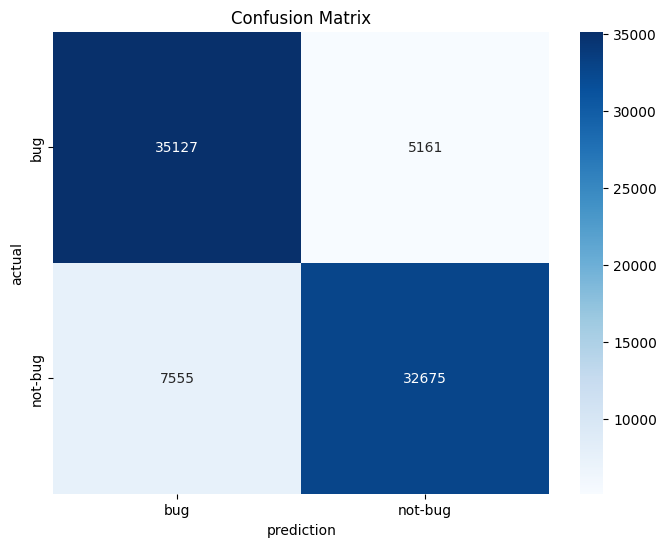

In [34]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_df,
            annot = True,
            fmt = 'd',
            cmap = 'Blues')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
print(class_report)

              precision    recall  f1-score   support

         bug      0.823     0.872     0.847     40288
     not-bug      0.864     0.812     0.837     40230

    accuracy                          0.842     80518
   macro avg      0.843     0.842     0.842     80518
weighted avg      0.843     0.842     0.842     80518

